In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

SImple neural network that is careated for image classification
limitation it only learns the apttren that are falt and specific to the area like if we flip theiage it cannot recgonize tha image because it simply learns that  pattren of the image as a whole
like image of the cat if ears are at left side it leanrs that all cats have easrs on left side 

## DATASET

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [6]:
unique_values = list(set(train_labels))
unique_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

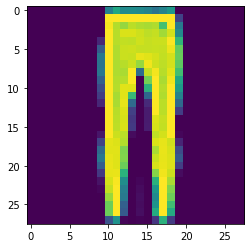

In [7]:
plt.figure()
plt.imshow(train_images[19880])
plt.grid(False)
plt.show()

In [8]:
train_images=train_images/255.0
test_images=test_images/255.0

## NEURAL NETWORK ARCHITECTUE

In [9]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(350,activation='relu'),keras.layers.Dense(len(set(train_labels)),activation='sigmoid')])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## TRAINING

In [11]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4782 - accuracy: 0.8286
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3634 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3226 - accuracy: 0.8816
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2991 - accuracy: 0.8906
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2819 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9006
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2539 - accuracy: 0.9042
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2431 - accuracy: 0.9088
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2344 - accuracy: 0.9127
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.226

## EVALUATION

In [12]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8820


## PREDICTION

In [13]:
predictions=model.predict(test_images)

313/313 [==============================] - 0s 850us/step


In [14]:
np.argmax(predictions[0])

9

In [15]:
print(predictions[0][np.argmax(predictions[0])])

0.9968454


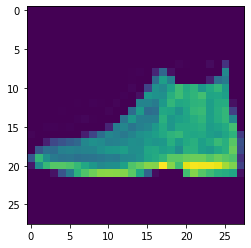

In [16]:
plt.figure()
plt.imshow(test_images[0])
plt.grid(False)
plt.show()

In [21]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## RAW FUNCTION

In [27]:
def predict(model, image):
    predictions = model.predict(np.array([image]))
    return np.argmax(predictions)

def compare(test_images, test_labels, index, model):
    class_index = predict(model, test_images[index])
    if test_labels[index] == class_index:
        print("predicted:", class_index, "== Actual:", test_labels[index])
    else:
        print("predicted:", class_index, "!= Actual:", test_labels[index])

# Get user input as an integer
image_number = int(input('Pick a number: '))

# Call the compare function with the integer input
compare(test_images, test_labels, image_number, model)


Pick a number: 79
1/1 [==============================] - 0s 14ms/step
predicted: 4 == Actual: 4
